In [2]:
import cv2
from matplotlib import pyplot as plt
import os
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import OneHotEncoder
from keras import models, layers
from keras.models import Sequential
from keras.utils import to_categorical
from keras import models, layers


from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier 
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv')

In [4]:
images = []
folder = 'All'
for filename in df['id_code']:
    img = cv2.imread(os.path.join(folder, filename +'.png'))
    if img is not None:
        image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        flattened_image = image_rgb.flatten()
        images.append(flattened_image)

In [5]:
idf = pd.DataFrame({'image': images})

In [6]:
data = pd.concat([df, idf], axis = 1)

In [7]:
data

,id_code,diagnosis,image
0,000c1434d8d7,2,"[44, 16, 2, 45, 16, 3, 46, 16, 3, 46, 16, 3, 4..."
1,001639a390f0,4,"[74, 30, 4, 76, 31, 5, 77, 32, 5, 78, 33, 5, 8..."
2,0024cdab0c1e,1,"[31, 7, 1, 32, 7, 1, 34, 7, 1, 35, 8, 1, 37, 8..."
3,002c21358ce6,0,"[36, 15, 5, 39, 16, 6, 41, 18, 6, 44, 19, 7, 4..."
4,005b95c28852,0,"[23, 8, 0, 25, 10, 0, 25, 11, 0, 25, 11, 0, 25..."
...,...,...,...
3657,ffa47f6a7bf4,2,"[64, 24, 3, 65, 24, 3, 66, 25, 3, 67, 25, 3, 6..."
3658,ffc04fed30e6,0,"[9, 2, 0, 10, 2, 0, 11, 2, 0, 12, 3, 0, 13, 2,..."
3659,ffcf7b45f213,2,"[43, 14, 1, 44, 14, 1, 46, 15, 1, 48, 17, 1, 4..."
3660,ffd97f8cd5aa,0,"[38, 16, 3, 40, 17, 4, 42, 18, 4, 44, 18, 4, 4..."


In [8]:
X = np.vstack(images)
y= np.array(df['diagnosis'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#y_test = scaler.transform(X_test)

print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


print("X_train sample:", X_train[0])  
print("y_train sample:", y_train[0])  



knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_train)
print("Accuracy:", accuracy) 

X_test shape: (733, 150528)
X_train shape: (2929, 150528)
y_train shape: (2929,)
y_test shape: (733,)
X_train sample: [36  8  0 ... 70 29  7]
y_train sample: 0
Accuracy: 0.6712141882673943


In [9]:
image_height = 224
image_width = 224
num_channels = 3

# Reshape the flattened input data to have the appropriate shape
X_train_reshaped = X_train.reshape(-1, image_height, image_width, num_channels)
X_test_reshaped = X_test.reshape(-1, image_height, image_width, num_channels)

# Verify the new shapes
print("X_train shape after reshaping:", X_train_reshaped.shape)
print("X_test shape after reshaping:", X_test_reshaped.shape)

X_train shape after reshaping: (2929, 224, 224, 3)
X_test shape after reshaping: (733, 224, 224, 3)


In [10]:

encoder = OneHotEncoder(categories='auto')
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

y_train_encoded = y_train_encoded.toarray()
y_test_encoded = y_test_encoded.toarray()


In [11]:
from sklearn.metrics import mean_squared_error


mse = mean_squared_error(y_test, y_pred_train)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.233287858117326


In [12]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_train)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.572987721691678


In [13]:
X_train.shape, y_train.shape

((2929, 150528), (2929,))

In [14]:
X_test.shape, y_test.shape

((733, 150528), (733,))

In [17]:

model = models.Sequential()


model.add(layers.Dense(5, activation='relu', input_shape=(254, 254, 3)))
model.add(layers.Conv2D(128,[3, 3], padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=[3, 3], strides=2, padding='same'))
model.add(layers.Conv2D(64,[3, 3], padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=[3, 3], strides=2, padding='same'))
model.add(layers.Conv2D(32,[3, 3], padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=[3, 3], strides=2, padding='same'))
model.add(layers.Conv2D(16,[3, 3], padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=[3, 3], strides=2, padding='same'))
model.add(layers.Conv2D(8,[3,3], padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=[3, 3], strides=2, padding='same'))
model.add(layers.Conv2D(4,[3, 3], padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=[3, 3], strides=2, padding='same'))
model.add(layers.Conv2D(2,[3, 3], padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=[3, 3], strides=2, padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(5, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 254, 254, 5)    │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 254, 254, 128)  │         5,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 127, 127, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 127, 127, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 64, 64, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 4)        │           292 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 4, 4, 4)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 2)        │            74 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 2)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │            45 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,359 (407.65 KB)

 Trainable params: 104,359 (407.65 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(X_train_reshaped, y_train_encoded, epochs=30, validation_data=(X_test_reshaped, y_test_encoded))
 
 
test_loss, test_acc = model.evaluate(X_train_reshaped, y_train_encoded)
print('Test accuracy:', test_acc)
 
 
predictions = model.predict(X_train_reshaped)


Epoch 1/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 336s 4s/step - categorical_accuracy: 0.4169 - loss: 2.0181 - val_categorical_accuracy: 0.4570 - val_loss: 1.2478
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 304s 3s/step - categorical_accuracy: 0.4884 - loss: 1.2340 - val_categorical_accuracy: 0.5048 - val_loss: 1.2067
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 300s 3s/step - categorical_accuracy: 0.5579 - loss: 1.1393 - val_categorical_accuracy: 0.5894 - val_loss: 1.1092
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 297s 3s/step - categorical_accuracy: 0.5798 - loss: 1.0671 - val_categorical_accuracy: 0.6235 - val_loss: 1.0412
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 302s 3s/step - categorical_accuracy: 0.6486 - loss: 0.9593 - val_categorical_accuracy: 0.6303 - val_loss: 1.0239
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 302s 3s/step - categorical_accuracy: 0.6560 - loss: 0.9322 - val_categorical_accuracy: 0.6521 - val_loss: 1.0078
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 301s 3s/step - categorical_accuracy: 0.6481 - loss: 0.95

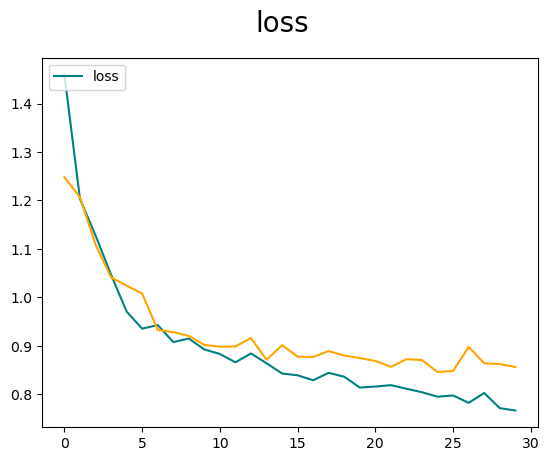

In [19]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='_valloss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


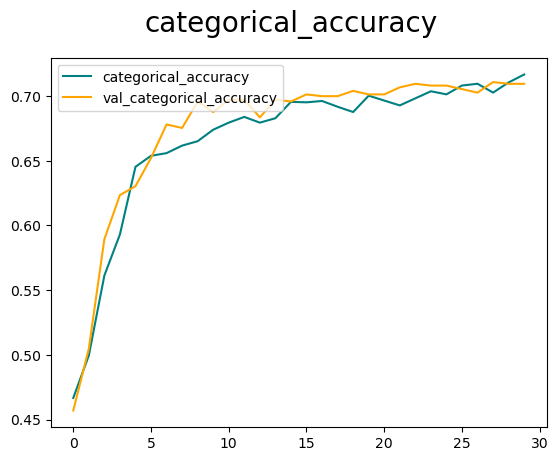

In [26]:
fig = plt.figure()
plt.plot(history.history['categorical_accuracy'], color='teal', label='categorical_accuracy')
plt.plot(history.history['val_categorical_accuracy'], color='orange', label='val_categorical_accuracy')
fig.suptitle('categorical_accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

**Hyperparameter Optimisation**

In [28]:

from keras.optimizers import SGD, RMSprop, Adam

param_grid = {'batch_size': [4,16], 'optimizer': [SGD, RMSprop, Adam]}

grid = GridSearchCV(estimator=KerasClassifier(build_fn=lambda: model, loss='categorical_crossentropy'),param_grid=param_grid,cv=3)

grid_result = grid.fit(X_train_reshaped,y_train_encoded)

d:\Anaconda\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


488/488 ━━━━━━━━━━━━━━━━━━━━ 186s 351ms/step - categorical_accuracy: 0.5562 - loss: 1.1719
245/245 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step


d:\Anaconda\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


489/489 ━━━━━━━━━━━━━━━━━━━━ 173s 354ms/step - categorical_accuracy: 0.6248 - loss: 1.0320
244/244 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step


d:\Anaconda\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


489/489 ━━━━━━━━━━━━━━━━━━━━ 171s 349ms/step - categorical_accuracy: 0.6648 - loss: 0.9480
244/244 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step


d:\Anaconda\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


488/488 ━━━━━━━━━━━━━━━━━━━━ 171s 350ms/step - categorical_accuracy: 0.6825 - loss: 0.9056
245/245 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step


d:\Anaconda\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


489/489 ━━━━━━━━━━━━━━━━━━━━ 169s 346ms/step - categorical_accuracy: 0.6703 - loss: 0.9414
244/244 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step


d:\Anaconda\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


489/489 ━━━━━━━━━━━━━━━━━━━━ 166s 339ms/step - categorical_accuracy: 0.6533 - loss: 0.9299
244/244 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step


d:\Anaconda\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


488/488 ━━━━━━━━━━━━━━━━━━━━ 166s 339ms/step - categorical_accuracy: 0.6680 - loss: 0.9165
245/245 ━━━━━━━━━━━━━━━━━━━━ 19s 79ms/step


d:\Anaconda\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


489/489 ━━━━━━━━━━━━━━━━━━━━ 165s 338ms/step - categorical_accuracy: 0.6740 - loss: 0.9052
244/244 ━━━━━━━━━━━━━━━━━━━━ 19s 79ms/step


d:\Anaconda\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


489/489 ━━━━━━━━━━━━━━━━━━━━ 172s 352ms/step - categorical_accuracy: 0.6752 - loss: 0.9056
244/244 ━━━━━━━━━━━━━━━━━━━━ 28s 114ms/step


d:\Anaconda\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


122/122 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - categorical_accuracy: 0.6773 - loss: 0.8769
62/62 ━━━━━━━━━━━━━━━━━━━━ 18s 290ms/step


d:\Anaconda\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


123/123 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - categorical_accuracy: 0.6912 - loss: 0.8352
61/61 ━━━━━━━━━━━━━━━━━━━━ 18s 290ms/step


d:\Anaconda\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


123/123 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - categorical_accuracy: 0.6998 - loss: 0.8435
61/61 ━━━━━━━━━━━━━━━━━━━━ 18s 287ms/step


d:\Anaconda\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


122/122 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - categorical_accuracy: 0.7132 - loss: 0.7981
62/62 ━━━━━━━━━━━━━━━━━━━━ 17s 281ms/step


d:\Anaconda\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


123/123 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - categorical_accuracy: 0.6766 - loss: 0.8609
61/61 ━━━━━━━━━━━━━━━━━━━━ 18s 296ms/step


d:\Anaconda\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


123/123 ━━━━━━━━━━━━━━━━━━━━ 181s 1s/step - categorical_accuracy: 0.6819 - loss: 0.8748
61/61 ━━━━━━━━━━━━━━━━━━━━ 18s 287ms/step


d:\Anaconda\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


122/122 ━━━━━━━━━━━━━━━━━━━━ 181s 1s/step - categorical_accuracy: 0.6928 - loss: 0.8322
62/62 ━━━━━━━━━━━━━━━━━━━━ 18s 285ms/step


d:\Anaconda\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


123/123 ━━━━━━━━━━━━━━━━━━━━ 183s 1s/step - categorical_accuracy: 0.7054 - loss: 0.8206
61/61 ━━━━━━━━━━━━━━━━━━━━ 17s 286ms/step


d:\Anaconda\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


123/123 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step - categorical_accuracy: 0.6957 - loss: 0.8468
61/61 ━━━━━━━━━━━━━━━━━━━━ 18s 299ms/step


d:\Anaconda\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


184/184 ━━━━━━━━━━━━━━━━━━━━ 273s 1s/step - categorical_accuracy: 0.6942 - loss: 0.8545


In [29]:
print("Best accuracy of: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best accuracy of: 0.692387 using {'batch_size': 16, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>}


In [30]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']


for mean, stdev, params in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean,stdev, params))

0.659282 (0.027189) with: {'batch_size': 4, 'optimizer': <class 'keras.src.optimizers.sgd.SGD'>}
0.670881 (0.007152) with: {'batch_size': 4, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>}
0.659962 (0.020943) with: {'batch_size': 4, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>}
0.686245 (0.009919) with: {'batch_size': 16, 'optimizer': <class 'keras.src.optimizers.sgd.SGD'>}
0.691022 (0.004806) with: {'batch_size': 16, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>}
0.692387 (0.008018) with: {'batch_size': 16, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>}


In [32]:
best_model = grid_result.best_estimator_

y_pred = best_model.predict(X_test_reshaped)
y_pred = (y_pred > 0.5)   

46/46 ━━━━━━━━━━━━━━━━━━━━ 14s 289ms/step


In [33]:
print("Shape of y_train:", y_train.shape)
print("Shape of y_pred_train:", y_pred_train.shape)

print("Length of y_train:", len(y_train))
print("Length of y_pred_train:", len(y_pred_train))

print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_pred_train:", np.unique(y_pred_train))


Shape of y_train: (2929,)
Shape of y_pred_train: (733,)
Length of y_train: 2929
Length of y_pred_train: 733
Unique values in y_train: [0 1 2 3 4]
Unique values in y_pred_train: [0 1 2 3 4]


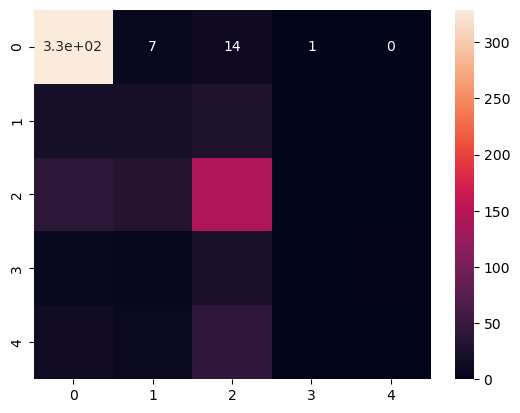

In [34]:
cm = confusion_matrix(y_test,y_pred_train)
sns.heatmap(cm,annot=True)
plt.show()